# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Cloning into 'nicomontoya_wrangling_assignment'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 9 (from 2)
Receiving objects: 100% (20/20), 5.88 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (5/5), done.
df.dtypes:
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,8/31/2015,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



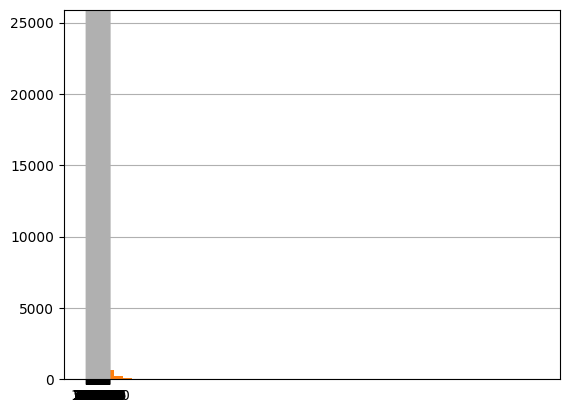

In [40]:
! git clone https://github.com/nicomontoya25/nicomontoya_wrangling_assignment.git
import os
os.chdir('nicomontoya_wrangling_assignment')
#1.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print("df.dtypes:") # want to see how variable price is being stored as
print(df.dtypes, '\n') # object=no bueno
display(df.head()) # Visualize
display(df.tail())

df['Price']=df["Price"].str.replace(',','') # removes commas
print('Before coercion: \n', df["Price"].describe(),'\n') #Cleaning begin, coerece to become numeric
df["Price"].hist(bins=50) # 0 bc no numbers, fix

df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric
df['Price_nan'] = df['Price'].isnull()

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n')
df['Price'].hist(bins = 50)
print('Total Missings: \n', sum(df['Price_nan']),'\n')

# We still have 181 missing variable which is caused by the fact that there are commas in the numbers greater than 999 with the "," being invalid
# To fully clean, we would have to strip the price variable of "," and then convert to numeric.
# went back to remove and now have zero missings

In [41]:
#1.2
import numpy as np
df = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)
print("df.dtypes:") # want to see how variable price is being stored as
print(df.dtypes, '\n') # object=no bueno
display(df.head()) # Visualize
display(df.tail())

# Check how dirty the variable is
print(df["subject_injury"].unique())
print(df["subject_injury"].value_counts(dropna=False))
# 1631+1446= 3077 with yes or no out of 12925 (roughly 24% has a value=problem)

df["subject_injury"] = df["subject_injury"].replace('nan',np.nan)
print(df["subject_injury"].value_counts(), '\n')
print(df["subject_injury"].unique())

pd.crosstab(df['subject_injury'], df['force_type']) #Crosstabulate
# The majority of force type outputs are bodily force and most NaN values have a force type description which begs the question why are there so many missing. Could be that subject injury is being under or miss reported meaning that the data set could be unreliable.

df.dtypes:
response_datetime     object
problem               object
is_911_call           object
primary_offense       object
subject_injury        object
force_type            object
force_type_action     object
race                  object
sex                   object
age                  float64
type_resistance       object
precinct               int64
neighborhood          object
dtype: object 



,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial
12924,2021/08/31 21:34:29,Unwanted Person,No,FORCE,NaN,Bodily Force,Push Away,White,Male,NaN,X,1,North Loop


[nan 'No' 'Yes']
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

[nan 'No' 'Yes']


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [43]:
#1.3
import numpy as np
df = pd.read_parquet("./data/justice_data.parquet")
display(df.head())

var = "WhetherDefendantWasReleasedPretrial"
print(df[var].unique()) # Find types output 1,0,9 (dummy variables for yes, no, nan)
print(df[var].value_counts(dropna=False), '\n')

df[var] = df[var].replace([9],np.nan) #changed to nan
print(df[var].value_counts(dropna=False), '\n')
#removing 9 cleans data and since the counts match up it was done properly

#1.4
var1 = "ImposedSentenceAllChargeInContactEvent"
var2 = "SentenceTypeAllChargesAtConvictionInContactEvent"
display(df[[var1,var2]].head())
display(df[[var1,var2]].tail())

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64 



,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,,9
1,60,0
2,12,1
3,.985626283367556,1
4,,4


,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
22981,,4
22982,,9
22983,,4
22984,,4
22985,,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [2]:
#2.1
import pandas as pd

url = 'https://sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)
print(df.dtypes, '\n')
#2.2
display(df.head())
list = ['pdf','href formula','href','Case Number','Case Number.1','original order','Unnamed: 21', 'Unnamed: 22']
new_df = df.drop(list,axis=1) # Drop only the variables on the list
print( new_df.columns, '\n', new_df.shape)
display(new_df.head())

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Fatal Y/N          object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object') 
 (7042, 15)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


Before coercion: 
 count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

After coercion: 
 count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

Total Missings: 
 2 

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939.

<Axes: >

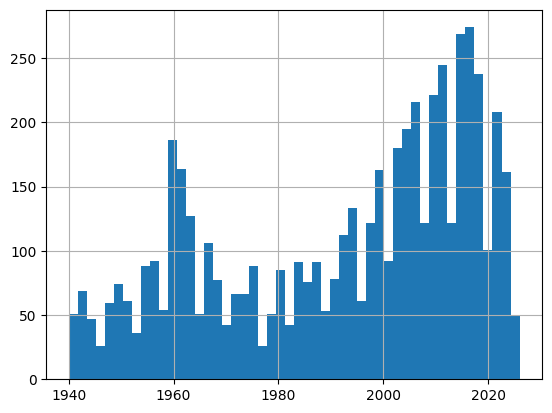

In [3]:
#2.3
print('Before coercion: \n', new_df["Year"].describe(),'\n')
new_df['Year_nan'] = new_df['Year'].isnull()
new_df["Year"] = pd.to_numeric(new_df["Year"], errors='coerce') # Range of values goes from 0 to 2026
print('After coercion: \n', new_df['Year'].describe(),'\n')
print('Total Missings: \n', sum(new_df['Year_nan']),'\n')
print(new_df['Year'].unique()) # 2 missing years (just 2 not that big a deal)

df_v1 = new_df[new_df['Year'] >= 1940]
df_v1['Year'].hist(bins = 50)
#Based on the histogram, after 1940 there is an increase in shark attacks over time.

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

<Axes: >

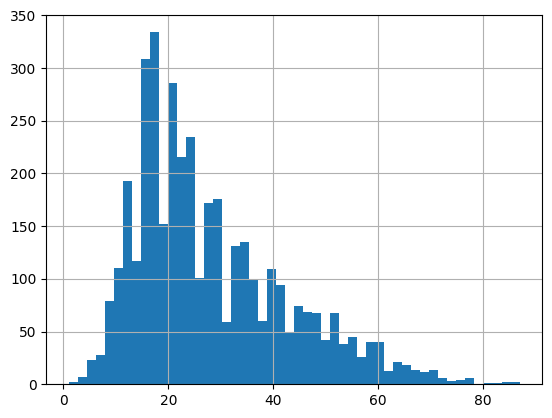

In [5]:
#2.4
print(df['Age'].unique())
print('Before coercion: \n', df["Age"].describe(),'\n')
df["Age"] = pd.to_numeric(df["Age"], errors='coerce') # make sure everything is numeric bc talking about age
df['Age_nan'] = df['Age'].isnull() # consolidated nulls
print('After coercion: \n', df['Age'].describe(),'\n')
print('Total Missings: \n', sum(df['Age_nan']),'\n') # found amount of nulls, a lot of ages missing (about 80%); not good
print(df['Age'].unique())

df['Age'].hist(bins = 50) # historgram creation

In [14]:
#2.5
df['Sex'] = df['Sex'].str.strip().str.upper() # Change format
df['Sex'] = df['Sex'].replace({'N': 'Unknown', 'M X 2': 'M'}) #Replace
df['Sex'] = df['Sex'].replace({'LLI': 'Unknown', '.': 'Unknown'})
print(df['Sex'].unique()) # Check they are right

male_proportion = df['Sex'].value_counts(normalize=True).get('M', 0) # Proportion calc
print(f"Proportion of victims who are male: {male_proportion * 100:.2f}%")

['M' 'F' nan 'UNKNOWN']
Proportion of victims who are male: 87.47%


In [25]:
#2.6
df['Type'] = df['Type'].str.strip().replace({ # replace
    'Watercraft': 'Unknown',
    'Provoked': 'Provoked',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    '?': 'Unknown',
    'Under investigation': 'Unknown'
})
print(df['Type'].unique()) #check

unprovoked_proportion = df['Type'].value_counts(normalize=True).get('Unprovoked', 0)
print(f"Proportion of attacks that are unprovoked: {unprovoked_proportion * 100:.2f}%")

['Provoked' 'Unprovoked' 'Unknown' nan]
Proportion of attacks that are unprovoked: 73.99%


In [37]:
#2.7
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper().replace({
    'F': 'UNKNOWN','M': 'UNKNOWN','n': 'UNKNOWN','NQ': 'UNKNOWN', '2017': 'UNKNOWN', 'Y X 2': 'Y',' N': 'N',
    ' N': 'N', 'N ': 'N', 'y': 'Y'}).fillna('UNKNOWN')
print(df['Fatal Y/N'].unique())

unprovoked_sex = df[df['Type'] == 'Unprovoked']['Sex'].value_counts(normalize=True)
fatal_type = df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True)
fatal_sex = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True)
print(unprovoked_sex* 100)
print(fatal_type* 100)
print(fatal_sex* 100)

['N' 'Y' 'UNKNOWN']
Sex
M          86.398886
F          13.581229
UNKNOWN     0.019885
Name: proportion, dtype: float64
Type        Fatal Y/N
Provoked    N            95.319813
            Y             3.276131
            UNKNOWN       1.404056
Unknown     UNKNOWN      46.290051
            N            37.099494
            Y            16.610455
Unprovoked  N            74.215894
            Y            24.263998
            UNKNOWN       1.520108
Name: proportion, dtype: float64
Sex      Fatal Y/N
F        N            76.178660
         Y            15.136476
         UNKNOWN       8.684864
M        N            69.715195
         Y            22.147532
         UNKNOWN       8.137272
UNKNOWN  N            50.000000
         Y            50.000000
Name: proportion, dtype: float64


In [ ]:
#2.8
# Sharks are more likley to launch unprovoked attacks on men
# An attack is more likely to be fatal when unprovoked
# More likely to be fatal if the victim is a male
# Accroding to the data if the attack is unprovked and as a guy I should be very scared of sharks,
# but mentally if compared to amount of people that enter the ocean per year it isn't as significant in my opinion.
whiteshark_attacks = df[df['Species '].str.contains('white shark', na=False, regex=True)]
proportion_whiteshark = len(whiteshark_attacks) / len(df)

In [39]:
#2.9
df['Species'] = df['Species'].str.lower()
print(df['Species'].unique())


KeyError: 'Species'